# Inclass

In [ ]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from   IPython.display                 import  display
from   pylab                           import  rcParams 
from   datetime                        import  datetime, timedelta
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from statsmodels.graphics.gofplots     import qqplot
from statsmodels.tsa.seasonal          import seasonal_decompose
from statsmodels.tsa.arima_model       import  ARMA
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## read AirTemp data and convert it to time series

In [ ]:
df= pd.read_csv('AirTemp.csv',parse_dates=True)

In [ ]:
df.head()

,Year,Month,AvgTemp
0,1920,Jan,40.6
1,1920,Feb,40.8
2,1920,Mar,44.4
3,1920,Apr,46.7
4,1920,May,54.1


In [ ]:
df.tail()

,Year,Month,AvgTemp
235,1939,Aug,61.8
236,1939,Sep,58.2
237,1939,Oct,46.7
238,1939,Nov,46.6
239,1939,Dec,37.8


In [ ]:
date_rng=  pd.date_range(start='1/1/1920', end='31/12/1939', freq='M')
df['TimeIndex'] = pd.DataFrame(date_rng)
df.drop(['Year','Month'],axis=1,inplace=True)
df.set_index('TimeIndex',inplace=True)
df.head()

,AvgTemp
TimeIndex,
1920-01-31,40.6
1920-02-29,40.8
1920-03-31,44.4
1920-04-30,46.7
1920-05-31,54.1


## plot the time series

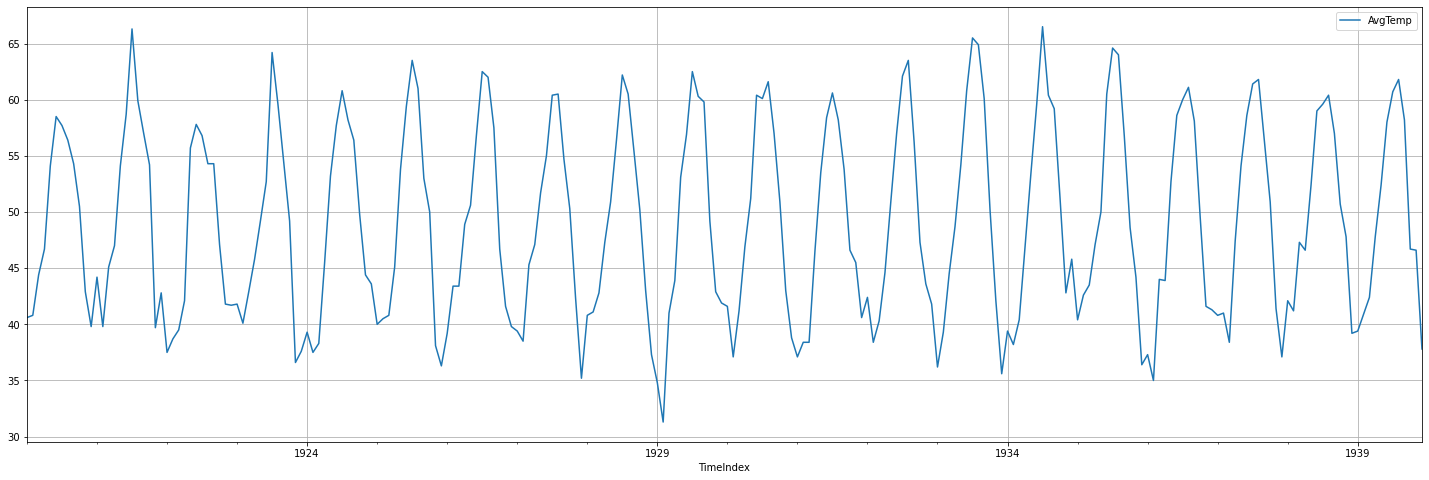

In [ ]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

# Check the stationarity of series using ADF test

In [ ]:
observations= df.values
test_result = adfuller(observations)

In [ ]:
print('ADF Statistic: %f' % test_result[0])
print('p-value: %f' % test_result[1])
print('Critical Values:')
for key, value in test_result[4].items():
	print('\t%s: %.5f' % (key, value))

ADF Statistic: -3.255492
p-value: 0.016989
Critical Values:
	1%: -3.45975
	5%: -2.87447
	10%: -2.57366


# If series is stationary, using ACF and PACF plot find the values of p and q

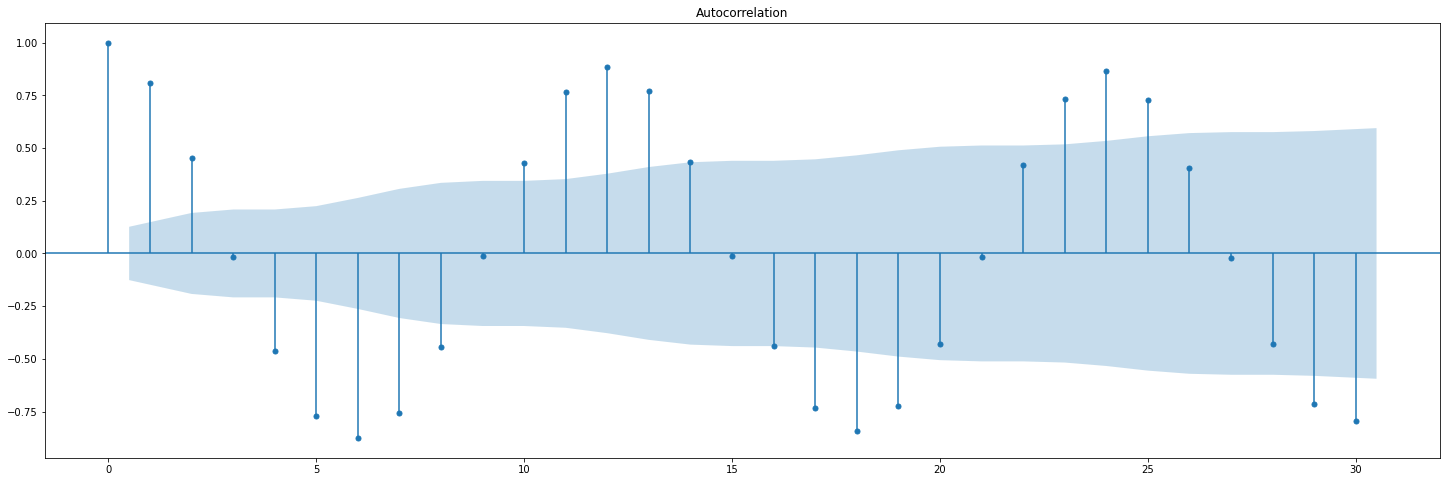

In [ ]:
plot_acf(df, lags=30);

## plotting PACF

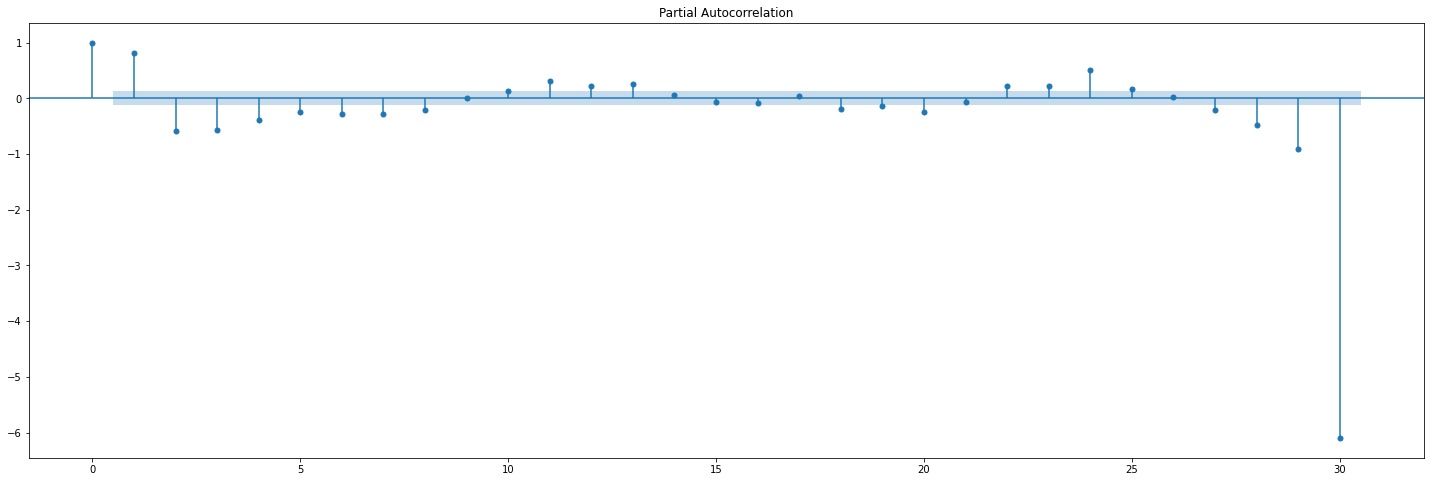

In [ ]:
plot_pacf(df,lags=30);

# Split the data into traininga nd testing set

In [ ]:
train_end=datetime(1935,12,31)
test_end=datetime(1939,12,31)

In [ ]:
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

# Build ARMA model for selected p and q

In [ ]:
model=ARMA(train,(2,3))

In [ ]:
model_fit=model.fit()

In [ ]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                AvgTemp   No. Observations:                  192
Model:                     ARMA(2, 3)   Log Likelihood                -464.948
Method:                       css-mle   S.D. of innovations                nan
Date:                Fri, 26 Feb 2021   AIC                            943.895
Time:                        11:21:55   BIC                            966.698
Sample:                    01-31-1920   HQIC                           953.130
                         - 12-31-1935                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.0937        nan        nan        nan         nan         nan
ar.L1.AvgTemp     1.7315   2.83e-06   6.11e+05      0.000       1.731       1.731
ar.L2.AvgTemp    -1.0000   3.27e-06  -3.

# Find predictions of model for the range of test data

In [ ]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [ ]:
predictions=model_fit.predict(start=pred_start, end=pred_end)

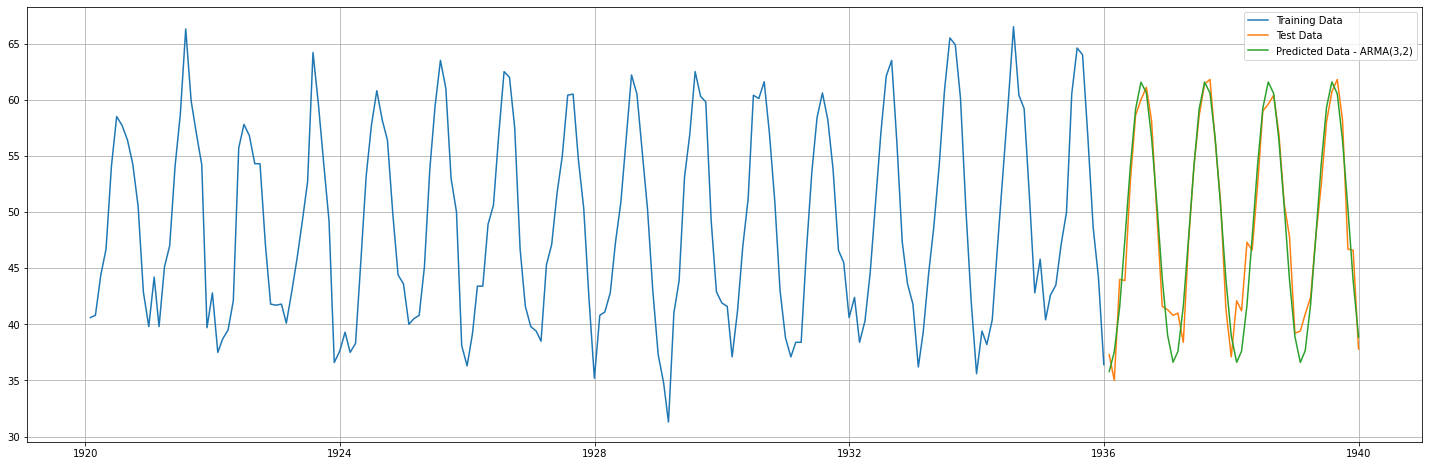

In [ ]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predictions,label='Predicted Data - ARMA(3,2)')
plt.legend(loc='best')
plt.grid();

# Find residuals for the model and plot using Q-Q- plot

In [ ]:
residuals = test.AvgTemp - predictions

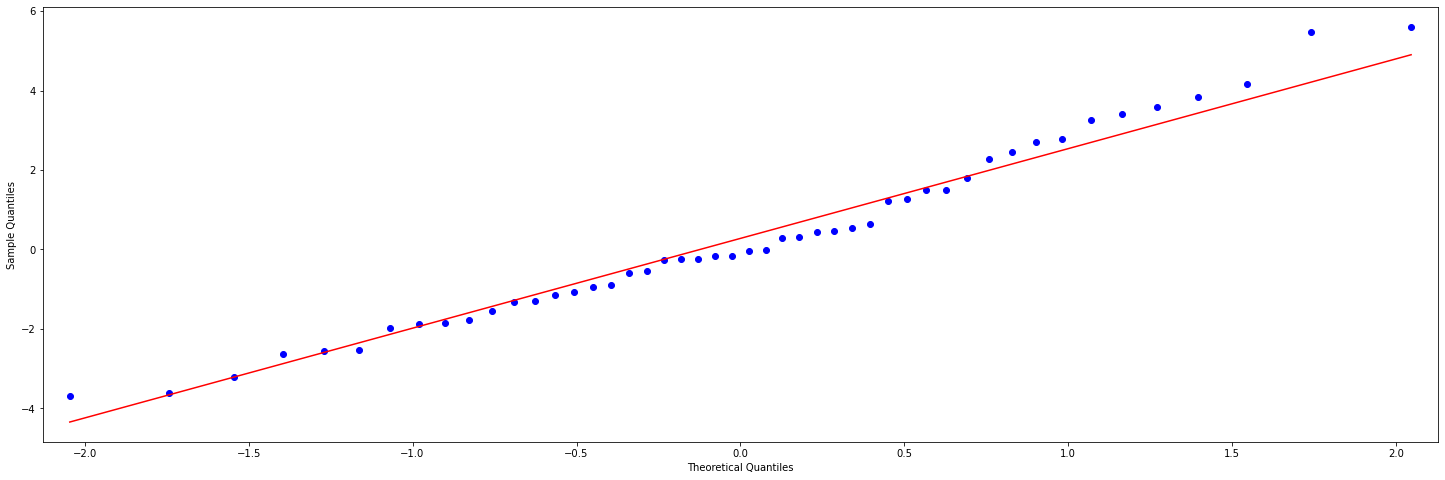

In [ ]:
qqplot(residuals,line="s");